# Imports

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from networkx.algorithms import bipartite

# Exercise 1.3

In [14]:
B = nx.Graph()

B.add_nodes_from([1, 2, 3, 4, 5], bipartite=0)
B.add_nodes_from(["1", "2", "3", "4", "5", "6"], bipartite=1)

edge_list=[(1, "1"), (1, "2"), (1, "3"), (2, "3"), (2, "5"), (3, "2"), (3, "6"), (4, "3"), (4, "4"), (5, "1"), (5, "5")]
B.add_edges_from(edge_list)

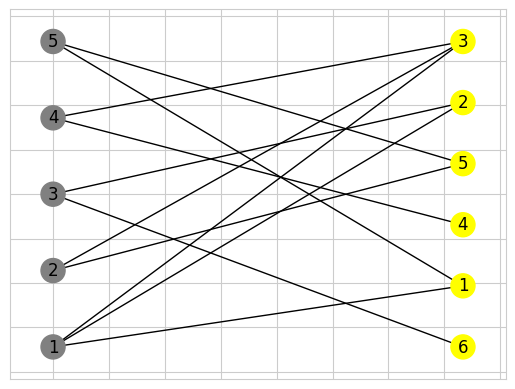

In [25]:
nx.draw_networkx(B,
                pos = nx.drawing.layout.bipartite_layout(B, [1, 2, 3, 4, 5]), node_color=["grey", "grey", "grey", "grey", "grey", "yellow", "yellow", "yellow", "yellow", "yellow", "yellow"])

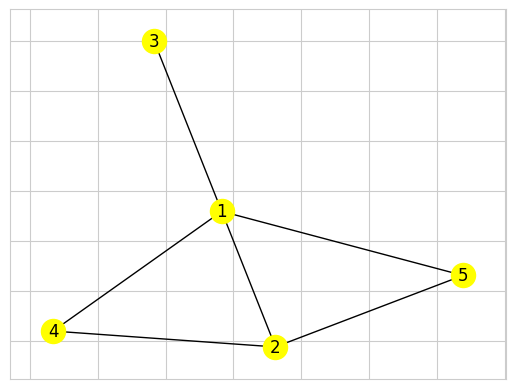

In [27]:
G = bipartite.projected_graph(B, [1, 2, 3, 4, 5])
nx.draw_networkx(G,
                pos=nx.spring_layout(G),
                with_labels=True,
                node_color="yellow")

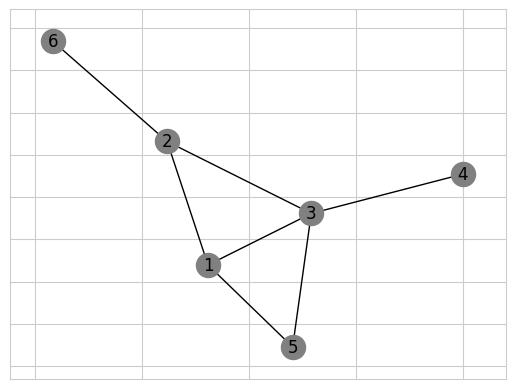

In [28]:
G = bipartite.projected_graph(B, ["1", "2", "3", "4", "5", "6"])
nx.draw_networkx(G,
                pos=nx.spring_layout(G),
                with_labels=True,
                node_color="grey")

# Exercise 2

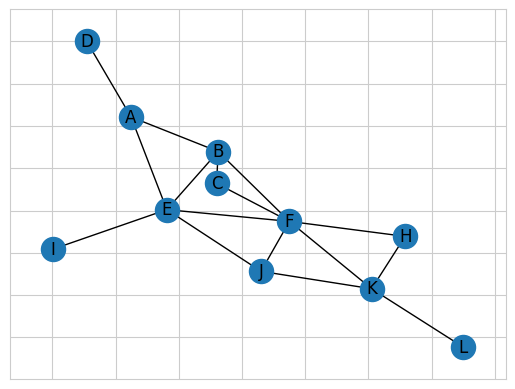

In [95]:
g = nx.Graph()

edge_list = [("A", "B"), ("A", "D"), ("A", "E"), ("B", "C"), ("B", "E"), ("B", "F"), ("C", "F"), ("E", "F"), ("E", "I"), ("E", "J"), ("F", "J"), ("F", "H"), ("F", "K"), ("H", "K"), ("J", "K"), ("K", "L")]

g.add_edges_from(edge_list)

nx.draw_networkx(g,
                pos=nx.spring_layout(g),
                with_labels=True)

In [96]:
data = {}
graphs = {}
iteration = 0

while(iteration >= 0):
    data[iteration] = {}
    data[iteration]["degree"] = dict(g.degree())
    data[iteration]["avg_degree"] = np.mean(list(data[iteration]["degree"].values()))
    data[iteration]["density"] = nx.density(g)
    graphs[iteration] = g.copy()

    for node, degree in data[iteration]["degree"].items():
        if degree < data[iteration]["avg_degree"]:
            g.remove_node(node)
        
    # nx.draw_networkx(g,
    #                 pos=nx.spring_layout(g),
    #                 with_labels=True)
    
    if (iteration > 0) and (data[iteration]["avg_degree"] == data[iteration - 1]["avg_degree"]) and (data[iteration]["density"] == data[iteration - 1]["density"]):
        iteration = -1
    
    else:
        iteration += 1
        

In [97]:
degree_df = pd.DataFrame.from_records(value["degree"] for value in data.values()).fillna("r")
others_df = pd.DataFrame.from_records({"avg_degree": value["avg_degree"], "density": value["density"]} for value in data.values())
iterations_df = degree_df.merge(others_df, how="inner", left_index=True, right_index=True)
print(iterations_df.to_latex())

\begin{tabular}{llllrlrlllllrr}
\toprule
{} &    A &    B &    D &  E &    C &  F &    I &    J &    H &    K &    L &  avg\_degree &   density \\
\midrule
0 &  3.0 &  4.0 &  1.0 &  5 &  2.0 &  6 &  1.0 &  3.0 &  2.0 &  4.0 &  1.0 &    2.909091 &  0.290909 \\
1 &  2.0 &  3.0 &    r &  4 &    r &  4 &    r &  3.0 &    r &  2.0 &    r &    3.000000 &  0.600000 \\
2 &    r &  2.0 &    r &  3 &    r &  3 &    r &  2.0 &    r &    r &    r &    2.500000 &  0.833333 \\
3 &    r &    r &    r &  1 &    r &  1 &    r &    r &    r &    r &    r &    1.000000 &  1.000000 \\
4 &    r &    r &    r &  1 &    r &  1 &    r &    r &    r &    r &    r &    1.000000 &  1.000000 \\
\bottomrule
\end{tabular}



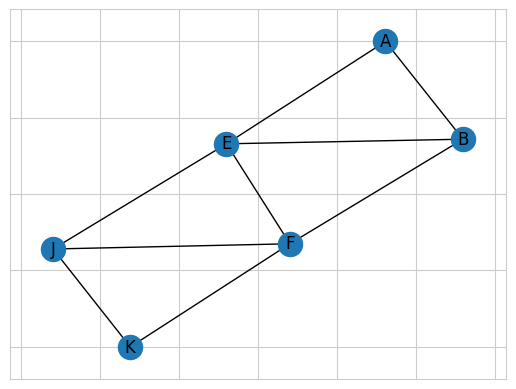

In [99]:
nx.draw_networkx(graphs[1],
                pos=nx.spring_layout(graphs[1]),
                with_labels=True)

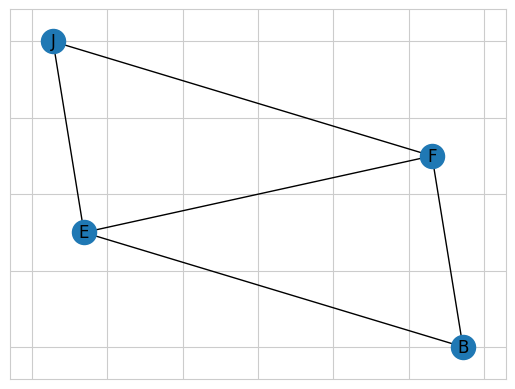

In [100]:
nx.draw_networkx(graphs[2],
                pos=nx.spring_layout(graphs[2]),
                with_labels=True)

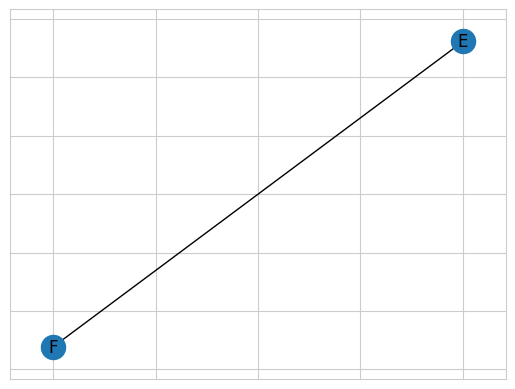

In [101]:
nx.draw_networkx(graphs[3],
                pos=nx.spring_layout(graphs[3]),
                with_labels=True)